# Movie Recommendation Revenue Analysis

**Background**

In this project I aim to clean and manipulate the "The Movies Dataset" from Kaggle to conduct exploratory and visual analysis of common characteristics found in top and bottom movies produced in terms of revenue success. The dataset contains over 45000 records of movies from MovieLens up until July 2017, combined with metadata extracted from TMDB.

**Resources**

MovieLens is a research site that recommends movies to its users using "collaborative filtering" technology. You can check them out more here: [Link](https://movielens.org/)

You can find "The Movies Dataset" by Rounak Banik on Kaggle here: [Link](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

**Methodology**

The data is ultimately segmented into two different groups: Top 20% and Bottom 20% in terms of revenue. Variables like production language, genre, production company, and budget are explored to find any association with the respective movie's revenue.

Specifically, I aim to explore the following questions:
- After cleaning and filtering, what are the revenue cutoffs of low, high, and median revenue movies?
- What are the distributions of low and high revenue movie groups? Are they skewed by certain indie films or Hollywood blockbusters?
- What do the distributions look like in terms of production countries? How do they fare in terms of visibility in getting recommended to users at MovieLens?

**Who can benefit form this analysis?**
Anyone who wants to gain insight into the movies recommended at MovieLens can gain from this analysis. Users of MovieLens will gain a better insight of the characteristics of the movies recommended and the MovieLens team can further conduct machine learning algorithms to recommend movies more accurately. 

Using classification and regression algorithms, MovieLens can predict the unique characteristics of different revenue groups and answer the following sample questions:
- Using further normalized data, which combination of characteristics will produce low/mid/high user ratings?
- Which combination of characteristics will produce user ratings above 5.0?
- For indie films that have low revenues, which combination of attributes did users rate the highest?

## Data Preparation, Filtering, and Exploration of Basic Information

In [1]:
import pandas as pd
import numpy as np

# import movies_metadata.csv file using panda
movies_metadata = pd.read_csv("~/Desktop/Data Science/Movie Revenue Analysis/movies_metadata.csv", dtype="unicode")

# set desired width when printing the first few rows of the data, so that we can have a better grasp of the dataset
pd.set_option('display.width', 300)
np.set_printoptions(linewidth=300)
pd.set_option('display.max_columns',30)

In [2]:
# drop columns with ambiguous values or link references that cannot be analyzed right now
movies_metadata.drop(columns=['adult','belongs_to_collection','homepage','poster_path','tagline','video'],inplace=True)
print("\nThe columns of this data set: ", movies_metadata.columns)
print("The dimensions of the dataframe: ", movies_metadata.shape)
print("\n")
movies_metadata.head()


The columns of this data set:  Index(['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'], dtype='object')
The dimensions of the dataframe:  (45466, 18)




,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/95,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/95,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/95,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/95,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/95,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173


In [3]:
# exploring columns and their corresponding data types
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                45466 non-null  object
 1   genres                45466 non-null  object
 2   id                    45466 non-null  object
 3   imdb_id               45449 non-null  object
 4   original_language     45455 non-null  object
 5   original_title        45466 non-null  object
 6   overview              44512 non-null  object
 7   popularity            45461 non-null  object
 8   production_companies  45463 non-null  object
 9   production_countries  45463 non-null  object
 10  release_date          45379 non-null  object
 11  revenue               45460 non-null  object
 12  runtime               45203 non-null  object
 13  spoken_languages      45460 non-null  object
 14  status                45379 non-null  object
 15  title                 45460 non-null

In [4]:
# convert budget, revenue, vote_average, vote_count columns to float type from object type
cols = ['budget', 'revenue', 'vote_average', 'vote_count']
for col in cols:
    movies_metadata[col] = pd.to_numeric(movies_metadata[col], errors='coerce')

**Since this analysis will be based on exploring the relationship between quantitative and categorical variables, I will filter the dataset so that only non-zero values exist for quantitative columns like budget and revenue.**

In [5]:
# filter out records that have 0 or NaN as values using Boolean conditionals, also filter out unreleased movies
filt = (movies_metadata['budget'] > 0) & (movies_metadata['revenue'] > 0) & (movies_metadata['vote_average'] > 0) \
        & (movies_metadata['vote_count'] > 0) & (movies_metadata['status'] == "Released")
movies_metadata = movies_metadata[filt]
movies_metadata.dropna(axis='index', how='any', subset=['budget','revenue','vote_average', 'vote_count'], inplace=True)
movies_metadata.drop(columns=['status', 'overview'], inplace=True)

In [37]:
# lets take a look at the filtered dataframe before continuing
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', None)
movies_metadata.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",10/30/95,373554033.0,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,262797249.0,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Jumanji,6.9,2413.0
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",31357,tt0114885,en,Waiting to Exhale,3.859495,"[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,81452156.0,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",949,tt0113277,en,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/15/95,187436818.0,170,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]",Heat,7.7,1886.0
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",9091,tt0114576,en,Sudden Death,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Imperial Entertainment', 'id': 21437}, {'name': 'Signature Entertainment', 'id': 23770}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",12/22/95,64350171.0,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0


In [7]:
print(movies_metadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 0 to 45422
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5370 non-null   float64
 1   genres                5370 non-null   object 
 2   id                    5370 non-null   object 
 3   imdb_id               5370 non-null   object 
 4   original_language     5370 non-null   object 
 5   original_title        5370 non-null   object 
 6   popularity            5370 non-null   object 
 7   production_companies  5370 non-null   object 
 8   production_countries  5370 non-null   object 
 9   release_date          5370 non-null   object 
 10  revenue               5370 non-null   float64
 11  runtime               5369 non-null   object 
 12  spoken_languages      5370 non-null   object 
 13  title                 5370 non-null   object 
 14  vote_average          5370 non-null   float64
 15  vote_count          

**We can now see that quantitative variables like budget, revenue, vote_average, and vote_count have been converted to float datatypes and are ready for statistical analysis.**

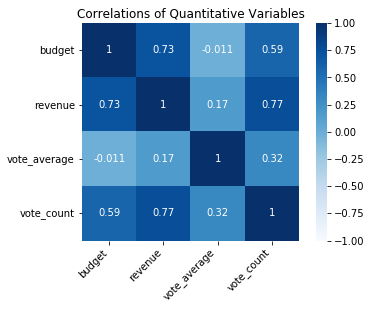

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# set up a correlation matrix heat map using Seaborn
corr = movies_metadata[cols].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlations of Quantitative Variables')
plt.show()

It seems like revenue has moderately strong positive correlations with budget and vote_count with correlation coefficients over 0.7. Budget and vote_count has a weaker positive correlation with 0.59.

I will start by segmenting the data into top 20% and bottom 20% of the total number of movies by revenue and provide details on common characteristics of the top and bottom movies.

## Data Partitioning and Exploration of New Groups of Data
- Determining meaningful cutoff point for data partition
- Filtering extreme outliers and incorrect records

In [9]:
eightieth = (np.percentile(movies_metadata['revenue'],80))
twentieth = (np.percentile(movies_metadata['revenue'],20))

print("The 80th percentile for movie revenues is (in USD):",eightieth)
print("The 20th percentile for movie revenues is (in USD):",twentieth)

import statistics
print("Mean of the revenues of movies is: ", statistics.mean(movies_metadata['revenue']))
print("Median of the revenues of movies is: ", statistics.median(movies_metadata['revenue']))

The 80th percentile for movie revenues is (in USD): 127433878.19999996
The 20th percentile for movie revenues is (in USD): 4407462.399999999
Mean of the revenues of movies is:  90494642.33817504
Median of the revenues of movies is:  30000000.0


We can see that by revenue, top 20% of the movies in the dataset are equal to or greater than around 127 million dollars, while bottom 20% are equal to or less than around 4.4 million dollars. However, seeing that the median is significantly lower than the mean of the revenues, the statistics suggest that the data is right skewed with top revenue outliers. We'll explore further down below.

In [10]:
top20_filt = movies_metadata['revenue']>=eightieth
bot20_filt = (movies_metadata['revenue']<=twentieth)

top20 = movies_metadata[top20_filt].copy()
bot20 = movies_metadata[bot20_filt].copy()

# To increase readibility when analyzing data, I will divide the revenue column and budget column 
# of each dataframe by 100k 
# $100,000 = 1
# $100,000,000 (100 million) = 1000
top20['revenue'] = top20['revenue'] / 100000
top20['budget'] = top20['budget'] / 100000
bot20['revenue'] = bot20['revenue'] / 100000
bot20['budget'] = bot20['budget'] / 100000

In [11]:
top20.sort_values(by=['revenue','budget'],ascending=False, inplace=True)
colTitles = ['title','revenue','budget','vote_average','vote_count','production_companies','original_language','spoken_languages','genres','release_date','runtime']
top20 = top20.reindex(columns=colTitles)
top20.head()

,title,revenue,budget,vote_average,vote_count,production_companies,original_language,spoken_languages,genres,release_date,runtime
14551,Avatar,27879.65087,2370.0,7.2,12114.0,"[{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Dune Entertainment', 'id': 444}, {'name': 'Lightstorm Entertainment', 'id': 574}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",12/10/09,162
26555,Star Wars: The Force Awakens,20682.23624,2450.0,7.5,7993.0,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Truenorth Productions', 'id': 1634}, {'name': 'Bad Robot', 'id': 11461}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 14, 'name': 'Fantasy'}]",12/15/15,136
1639,Titanic,18450.34188,2000.0,7.5,7770.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}, {'name': 'Lightstorm Entertainment', 'id': 574}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'sv', 'name': 'svenska'}, {'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 53, 'name': 'Thriller'}]",11/18/97,194
17818,The Avengers,15195.57910,2200.0,7.4,12000.0,"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Marvel Studios', 'id': 420}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]",4/25/12,143
25084,Jurassic World,15135.28810,1500.0,6.5,8842.0,"[{'name': 'Universal Studios', 'id': 13}, {'name': 'Amblin Entertainment', 'id': 56}, {'name': 'Legendary Pictures', 'id': 923}, {'name': 'Fuji Television Network', 'id': 3341}, {'name': 'Dentsu', 'id': 6452}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]",6/9/15,124


In [12]:
top20.describe()

,revenue,budget,vote_average,vote_count
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,3285.398453,801.835545,6.502700,2176.657356
std,2509.965741,573.594055,0.744137,1967.400578
min,1276.004350,0.150000,4.000000,2.000000
25%,1707.924985,370.000000,6.000000,844.000000
50%,2372.925115,685.000000,6.500000,1541.500000
75%,3735.535482,1100.000000,7.000000,2878.250000
max,27879.650870,3800.000000,8.500000,14075.000000


There are 1074 movies that are in the top 20%, the average revenue around 328 million dollars. Movie with the least amount of revenue being less than 127.6 million dollars and the highest revenue being 2.8 billion dollars. 

In [13]:
bot20.sort_values(by=['revenue','budget'],ascending=False, inplace=True)
colTitles = ['title','revenue','budget','vote_average','vote_count','production_companies','original_language','spoken_languages','genres','release_date','runtime']
bot20 = bot20.reindex(columns=colTitles)

In [14]:
bot20.describe()

,revenue,budget,vote_average,vote_count
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,14.054179,62.022193,6.136685,121.081006
std,13.184721,82.349026,1.050067,221.491008
min,0.000010,0.000010,1.000000,1.000000
25%,2.053330,8.246935,5.600000,14.000000
50%,10.046995,33.739250,6.200000,46.000000
75%,23.562288,88.800000,6.800000,135.000000
max,44.000000,926.200000,9.000000,3574.000000


There are 1074 movies in the bottom 20%. Of the movies by revenue, the average revenue is around 1.4 million dollars, with the smallest revenue being 1 dollar and the largest revenue being 44 million dollars. Let's take a look at the movies with the lowest revenue and check if they are logical.

In [15]:
bot20.tail(20)

,title,revenue,budget,vote_average,vote_count,production_companies,original_language,spoken_languages,genres,release_date,runtime
2882,Dreaming of Joseph Lees,0.00007,20.00000,6.0,2.0,"[{'name': 'Fox Entertainment Group', 'id': 85721}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}]",10/29/99,92
15917,Bran Nue Dae,0.00007,0.00007,5.2,6.0,[],en,[],"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10769, 'name': 'Foreign'}, {'id': 10749, 'name': 'Romance'}]",8/9/09,82
2663,Never Talk to Strangers,0.00006,64.00000,4.7,31.0,"[{'name': 'TriStar Pictures', 'id': 559}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 10749, 'name': 'Romance'}]",10/20/95,86
12946,To Rob a Thief,0.00006,40.02313,6.0,4.0,"[{'name': 'Narrow Bridge Films', 'id': 6535}]",en,"[{'iso_639_1': 'es', 'name': 'Español'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}, {'id': 10769, 'name': 'Foreign'}]",8/31/07,98
5101,Split Second,0.00005,0.00007,5.8,64.0,"[{'name': 'Entertainment', 'id': 7676}, {'name': 'Muse Productions', 'id': 15231}, {'name': 'Challenge Film Corporation', 'id': 75037}, {'name': 'XYZ Funding N.V.', 'id': 75038}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'name': 'Action'}, {'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 80, 'name': 'Crime'}]",5/1/92,90
274,Miami Rhapsody,0.00005,0.00006,5.6,7.0,"[{'name': 'Hollywood Pictures', 'id': 915}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",1/27/95,95
922,East of Eden,0.00005,0.00001,7.5,163.0,"[{'name': 'Warner Bros.', 'id': 6194}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 18, 'name': 'Drama'}]",3/9/55,115
4937,American Adobo,0.00004,0.00344,5.3,3.0,"[{'name': 'ABS-CBN Film Productions', 'id': 4676}, {'name': 'Star Cinema Productions', 'id': 10417}, {'name': 'Unitel Classics', 'id': 10706}]",en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'tl', 'name': ''}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",9/29/01,104
9589,Man Trouble,0.00004,0.00030,4.7,11.0,"[{'name': 'American Filmworks', 'id': 8310}, {'name': 'Cecchi Gori Pictures', 'id': 65393}, {'name': 'Penta Entertainment', 'id': 73866}, {'name': 'Budding Grove', 'id': 73867}]",en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",7/17/92,100
37250,Raja Natwarlal,0.00004,0.00005,5.5,8.0,"[{'name': 'UTV Motion Pictures', 'id': 2320}]",hi,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]",8/29/14,141


Right off the bat, we see the film "East of Eden" starring James Dean to have made 5 dollars worth of revenue according to the data. To filter out the **outliers** and **reduce the probability of analyzing incorrect data**, I will exclude movies in the bottom 20% that made less than **$100,000**.

In [16]:
bot20 = bot20[bot20['revenue'] >= 1]

In [38]:
bot20.describe()

,revenue,budget,vote_average,vote_count
count,877.000000,877.000000,877.000000,877.000000
mean,17.154342,66.282613,6.184493,129.353478
std,12.667119,84.576745,1.030444,237.660603
min,1.000000,0.000010,1.000000,1.000000
25%,5.666110,10.000000,5.600000,16.000000
50%,14.619890,38.000000,6.300000,49.000000
75%,26.268000,96.000000,6.800000,142.000000
max,44.000000,926.200000,9.000000,3574.000000


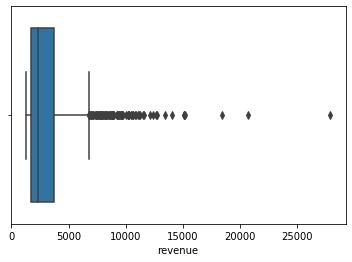

In [17]:
sns.boxplot(top20['revenue'])

**Interpreting the boxplot**, it seems like the majority of the top 20% of movie revenues lie between around 100 million dollars and around 400 million dollars--as noted by the interquartile range. Most outliers lie between around 700 million dollars in revenue up until even around 2.8 billion dollars in revenue.

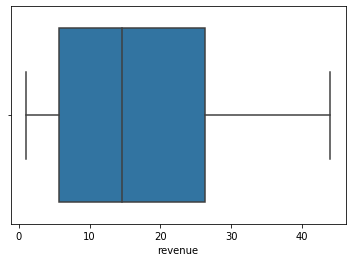

In [18]:
sns.boxplot(bot20['revenue'])

Now that we are done segmenting the movies_metadata dataframe into two different groups--top 20% and bottom 20% by revenues--and filtered down to the core quantitative and qualitative columns, the two datasets are ready to be analyzed by budget, genres, languages, and production companies to see how these variables are related to our dependent variable "revenue".

I'll first start by analyzing what are the most common languages in the whole dataset by building a frequency table next.

## Explanatory Variables Analysis and Visual Representations
- Observing frequency distributions of movie attributes
- Visualizing categorical variables--e.g. production languages
- Normalizing *production companies* column by parsing and converting records

In [19]:
lang_counts = pd.value_counts(movies_metadata.original_language).to_frame().reset_index()
lang_counts.columns = ['language','count']
lang_counts['percentage'] = lang_counts['count']/sum(lang_counts['count'])
lang_counts

,language,count,percentage
0,en,4789,0.891806
1,hi,99,0.018436
2,fr,89,0.016574
3,ru,69,0.012849
4,ja,39,0.007263
5,es,38,0.007076
6,it,31,0.005773
7,zh,29,0.005400
8,ta,26,0.004842
9,ko,25,0.004655


Calculating the percentages of the frequency of the languages, we see that nearly 90% of the movies out of around 5300 movies (after filtering) are made in English. To take a deeper look into the other languages that compose the remaining 10% of the movies, we'll create a bar chart and a pie chart of the top 10 languages excluding English to provide a more meaningful insight to the proportions of the languages.

In [20]:
other_langs = lang_counts[lang_counts['language'] != 'en'].copy()
other_langs.reset_index(inplace=True)
other_langs['percentage'] = other_langs['count'] / sum(other_langs['count'])
other_langs = other_langs.iloc[:10,:]
other_langs

,index,language,count,percentage
0,1,hi,99,0.170396
1,2,fr,89,0.153184
2,3,ru,69,0.118761
3,4,ja,39,0.067126
4,5,es,38,0.065404
5,6,it,31,0.053356
6,7,zh,29,0.049914
7,8,ta,26,0.044750
8,9,ko,25,0.043029
9,10,de,22,0.037866


In [21]:
print(other_langs['count'].sum())

467


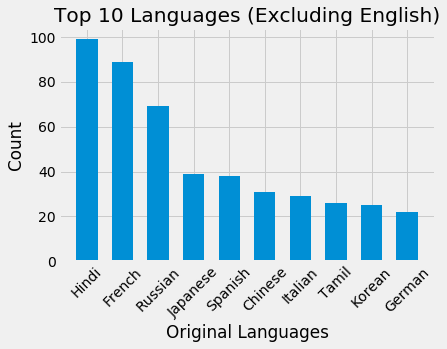

In [22]:
# Lets visualize the proportions that top 10 languages take with a bar chart
lang_x = other_langs['language']
count_y = other_langs['count']
languages = ['Hindi','French','Russian','Japanese','Spanish','Chinese','Italian','Tamil','Korean','German']

plt.style.use("fivethirtyeight")
plt.bar(lang_x, count_y, width=0.6)
plt.xticks(ticks=lang_x, labels=languages, rotation=45)
plt.xlabel("Original Languages")
plt.ylabel("Count")
plt.title('Top 10 Languages (Excluding English)')
plt.show()


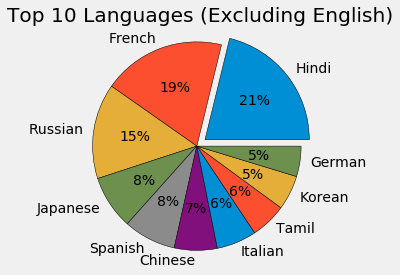

In [23]:
explode = [0.1,0,0,0,0,0,0,0,0,0]
plt.pie(count_y, labels=languages, autopct='%1.0f%%', wedgeprops={'edgecolor':'black'}, explode=explode)
plt.title("Top 10 Languages (Excluding English)")
plt.axis("equal")
plt.show()

From a quick visualization of movies with languages other than English, we can see that Hindi, French, and Russian movies take up more than half of the proportions when it comes to most popular languages. 

However, this is a sampling of less than 500 movies and cannot be regarded as an accurate depiction of true population proportions. Keeping this in mind, we can further analyze the language proportions in the top 20% and bottom 20% of movies by revenues to compare any differences or similarities in distributions.

In [24]:
# For code readibility and function, I'll utilize Counter module to build frequency
import collections

top20_lcounter = collections.Counter(top20['original_language'])
bot20_lcounter = collections.Counter(bot20['original_language'])

print("The top 10 most common languages in Top 20% of movies by revenue are:", top20_lcounter.most_common(10))
print("\nThe top 10 most common languages in Bottom 20% of movies by revenue are:", bot20_lcounter.most_common(10))

The top 10 most common languages in Top 20% of movies by revenue are: [('en', 1051), ('zh', 8), ('ja', 7), ('fr', 3), ('hi', 1), ('te', 1), ('it', 1), ('da', 1), ('cn', 1)]

The top 10 most common languages in Bottom 20% of movies by revenue are: [('en', 707), ('fr', 28), ('ru', 28), ('hi', 15), ('es', 10), ('it', 8), ('ja', 8), ('de', 8), ('ml', 8), ('zh', 6)]


In [25]:
top20_langs = []      # list of 10 most common languages in top20
top20_lcount = []     # count of each respective languages
top20_lsum = 0        # sum of language counts to calculate percentage

for item in top20_lcounter.most_common(10):
    top20_langs.append(item[0])
    top20_lcount.append(item[1])
    top20_lsum += item[1]
    
# I created a dataframe for the most common languages and its proportions in Top 20
top_commonLangs = pd.DataFrame(index=top20_langs, columns=['count','percentage'])
top_commonLangs['count'] = top20_lcount
for row in top_commonLangs:
    top_commonLangs['percentage'] = (top_commonLangs['count']/top20_lsum)*100

top_commonLangs.style.background_gradient(subset=['count', 'percentage'], cmap='Blues')

,count,percentage
en,1051,97.858473
zh,8,0.744879
ja,7,0.651769
fr,3,0.279330
hi,1,0.093110
te,1,0.093110
it,1,0.093110
da,1,0.093110
cn,1,0.093110


Top 20% of the movies by revenues consists of 97.8% of the movies produced in English. The remaining movies largely consist of Chinese, Japanese, and some French movies along with the remainder of other languages.

In [26]:
bot20_langs = []
bot20_lcount = []
bot20_lsum = 0

for item in bot20_lcounter.most_common(10):
    bot20_langs.append(item[0])
    bot20_lcount.append(item[1])
    bot20_lsum += item[1]
    
bot_commonLangs = pd.DataFrame(index=bot20_langs, columns=['count','percentage'])
bot_commonLangs['count'] = bot20_lcount
for row in bot_commonLangs:
    bot_commonLangs['percentage'] = (bot_commonLangs['count']/bot20_lsum)*100
    
bot_commonLangs.style.background_gradient(subset=['count', 'percentage'], cmap='BuGn')

,count,percentage
en,707,85.593220
fr,28,3.389831
ru,28,3.389831
hi,15,1.815981
es,10,1.210654
it,8,0.968523
ja,8,0.968523
de,8,0.968523
ml,8,0.968523
zh,6,0.726392


Unlike the Top 20%, the Bottom 20% of the movies by revenue consist of approximately 85% English movies. The remaining 15% are largely comprised of French, Russian, and the remainder of other languages. It seems like the movies on the bottom 20% by revenue are slightly more diverse in terms of languages.

Moving on, lets explore which companies produced the most amount of high revenue movies and which companies produced the most amount of low revenue movies.

Some of the columns, including the 'production_companies' column, are JSON objects and require parsing and converting to conduct a proper analysis. Plus, these columns contain multiple entries for one row, causing data redundancy issues and require to be normalized.

In [27]:
# define a function that will create a new list of dictionaries, 
def companies_list(liste, df):
    for index, row in df.iterrows():
        prodCos = row.production_companies.replace("[","").replace("]","")
        if prodCos == "":
            continue
        prodCos = ast.literal_eval(prodCos)
        title = row.title
        rev = row.revenue
        budget = row.budget

        for item in prodCos:
            if type(item) != str:
                item['title'] = title
                item['revenue'] = rev
                item['budget'] = budget
                liste.append(item)

In [29]:
import ast

top_companies = []
companies_list(top_companies,top20)   
topCo_df = pd.DataFrame(top_companies)
topCo_df.set_index('id', inplace=True)

In [30]:
bot_companies = []
companies_list(bot_companies,bot20)
botCo_df = pd.DataFrame(bot_companies)
botCo_df.set_index('id', inplace=True)

These dataframes are not fully normalized to 3NF, but for the objective of analyzing company characteristics in terms of financials I normalized it to 2NF.

Now lets take a look at companies that produced a notable amount of high-grossing movies, companies that produced a notable amount of low-grossing movies, and companies that are the most efficient when it comes to revenue:budget ratio.

In [36]:
topCo_df

,name,title,revenue,budget
id,,,,
289,Ingenious Film Partners,Avatar,27879.65087,2370.0
306,Twentieth Century Fox Film Corporation,Avatar,27879.65087,2370.0
444,Dune Entertainment,Avatar,27879.65087,2370.0
574,Lightstorm Entertainment,Avatar,27879.65087,2370.0
1,Lucasfilm,Star Wars: The Force Awakens,20682.23624,2450.0
...,...,...,...,...
33,Universal Pictures,U-571,1276.66415,620.0
104,Canal Plus,U-571,1276.66415,620.0
10308,Dino De Laurentiis Company,U-571,1276.66415,620.0


In [31]:
botCo_df

,name,title,revenue,budget
id,,,,
10104,New Regency Pictures,Simply Irresistible,43.98989,60.0
20555,Taurus Film,Simply Irresistible,43.98989,60.0
62072,Polar Entertainment Corporation,Simply Irresistible,43.98989,60.0
3272,Aramid Entertainment Fund,Beyond a Reasonable Doubt,43.88563,250.0
11647,Autonomous Films,Beyond a Reasonable Doubt,43.88563,250.0
...,...,...,...,...
109,Rome Paris Films,A Woman Is a Woman,1.00655,1.6
8930,Euro International Film (EIA),A Woman Is a Woman,1.00655,1.6
494,AVCO Embassy Pictures,Roadgames,1.00000,17.5


In [32]:
top5companies = []
five = 5
for name in topCo_df.groupby('name').count().sort_values('title', ascending=False).index:
    if five > 0:
        top5companies.append(name)
        five-=1

bot5companies = []
five = 5
for name in botCo_df.groupby('name').count().sort_values('title', ascending=False).index:
    if five > 0:
        bot5companies.append(name)
        five-=1

print(top5companies)
print(bot5companies)

['Warner Bros.', 'Universal Pictures', 'Twentieth Century Fox Film Corporation', 'Paramount Pictures', 'Columbia Pictures']
['Canal+', 'Warner Bros.', 'Universal Pictures', 'Miramax Films', 'Metro-Goldwyn-Mayer (MGM)']


In [33]:
topCompanyRatios = {}

for name in top5companies:
    company = topCo_df[topCo_df['name'] == name].groupby('name').sum()
    topCompanyRatios[name] = float(company['revenue']/company['budget'])
    
print({k:v for k, v in sorted(topCompanyRatios.items(), key=lambda item: item[1])})

{'Columbia Pictures': 3.091401432825899, 'Warner Bros.': 3.583371281872199, 'Paramount Pictures': 3.831363264166714, 'Universal Pictures': 4.1781411901888665, 'Twentieth Century Fox Film Corporation': 4.284343548351653}


The five companies that produced the most number of films in the Top 20% movies by revenue are Warner Bros., Universal Pictures, Twentieth Century Fox Film Corporation, Paramount Pictures, and Columbia Pictures.

Out of these five companies, Twentieth Century Fox Film Corporation has the highest revenue to budget ratio. The total revenue that Twentiet Century Fox Co. earned from its movies is nearly 4.3 times of its total budget. All five companies' ratios range from approximately 3 to 4.

In [35]:
botCompanyRatios = {}

for name in bot5companies:
    company = botCo_df[botCo_df['name'] == name].groupby('name').sum()
    botCompanyRatios[name] = float(company['revenue']/company['budget'])    
    
print({k:v for k, v in sorted(botCompanyRatios.items(), key=lambda item: item[1])})

{'Universal Pictures': 0.11514052959700674, 'Warner Bros.': 0.13228786926731853, 'Canal+': 0.14584573859109692, 'Metro-Goldwyn-Mayer (MGM)': 0.2753824742820403, 'Miramax Films': 0.5339048886121097}


The five companies that produced the most number of films in the Bottom 20% movies by revenue are Universal Pictures, Warner Bros, Canal+, and Metro-Godlwyn-Mayer, and Miramax Films. 

Out of these five companies, Universal Pictures has the lowest revenue to budget ratio of around 0.115. All five of these companies made revenues that are less than 53.39% of their budgets in their low revenue movies. 

## Conclusion

**Insights**:
- Average revenue of the movies in the Top 20% by revenue is around 328 million dollars, with the highest record being 2.76 billion dollars by Avatar
- Average revenue of the movies in the Bottom 20% by revenue is around 1.7 million dollars after filtering for extreme outliers
- Movies in the Bottom 20% by revenue had approximately 12% more foreign movies
- Contrary to expectations that Bottom 20% movies are mainly comprised of Indie/Small-scale companies, major production companies like Universal Pictures, Warner Bros, and Miramax Films take up a large share of the group instead

**Notes**:
- The usefulness of this analysis to MovieLens is conditional on how *revenue* affects *average voter ratings*. Although *revenue* has strong positive correlation with *vote counts*, it has a very weak correlation with *average vote ratings*
- When filtered down, there were only about 5300 records of movies to analyze. Even less data remained when data anomalies were fixed
- In order to conduct meaningful classification and classification algorithms to identify common characteristics in each respective revenue groups (Top 20% and Bottom 20%), the dataset has to be further normalized. For example, the *Genres* column has list of JSON objects that needs to be extracted and further split into dummy variables if we want to analyze movies by genres in different revenue groups